In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Create Sample Data

# Stratified sampling

In [6]:

# Create a sample dataset of employees
data = {
    'employee_id': range(1, 101),
    'department': np.random.choice(['Engineering', 'Sales', 'HR', 'Marketing'], 100, p=[0.5, 0.3, 0.1, 0.1]),
    'salary': np.random.randint(50000, 120000, 100)
}
population_df = pd.DataFrame(data)
print("Original Population Data (First 5 Rows)")
print(population_df.head(100))
print(f"\nPopulation Size: {len(population_df)}")

Original Population Data (First 5 Rows)
    employee_id   department  salary
0             1  Engineering   60176
1             2           HR   68199
2             3  Engineering   51387
3             4           HR   81064
4             5        Sales   50123
..          ...          ...     ...
95           96  Engineering   73274
96           97  Engineering   81789
97           98  Engineering   71052
98           99        Sales   99088
99          100           HR   56253

[100 rows x 3 columns]

Population Size: 100


In [9]:
population_df

,employee_id,department,salary
0,1,Engineering,60176
1,2,HR,68199
2,3,Engineering,51387
3,4,HR,81064
4,5,Sales,50123
...,...,...,...
95,96,Engineering,73274
96,97,Engineering,81789
97,98,Engineering,71052
98,99,Sales,99088


In [8]:
type(population_df)

pandas.core.frame.DataFrame

In [4]:
display(population_df)

,employee_id,department,salary
0,1,Marketing,87205
1,2,Engineering,70229
2,3,Engineering,83300
3,4,Engineering,98015
4,5,Engineering,101889
...,...,...,...
95,96,Engineering,52408
96,97,Sales,66360
97,98,Sales,83221
98,99,HR,103934


In [7]:
print("\nPopulation Department Distribution:")
print(population_df['department'].value_counts(normalize=True))


Population Department Distribution:
department
Engineering    0.45
Sales          0.40
HR             0.10
Marketing      0.05
Name: proportion, dtype: float64


In [12]:
# Get a random sample of 20 employees. `frac` can also be used for a fraction.
simple_random_sample = population_df.sample(n=20, random_state=42) # random_state for reproducibility
print("1. Simple Random Sample (n=20)")
print(simple_random_sample)
print("\nSample Department Distribution:")
print(simple_random_sample['department'].value_counts(normalize=True))

1. Simple Random Sample (n=20)
    employee_id   department  salary
83           84  Engineering   53845
53           54        Sales   80117
70           71    Marketing  116561
45           46  Engineering   57274
44           45        Sales  105885
39           40  Engineering   70255
22           23  Engineering   59513
80           81  Engineering   91044
10           11        Sales   89270
0             1  Engineering   60176
18           19  Engineering  118518
30           31        Sales   61162
73           74  Engineering  114318
33           34        Sales   51719
90           91  Engineering  100247
4             5        Sales   50123
76           77           HR  100265
77           78  Engineering   65224
12           13        Sales   91270
31           32  Engineering   59750

Sample Department Distribution:
department
Engineering    0.55
Sales          0.35
Marketing      0.05
HR             0.05
Name: proportion, dtype: float64


# Stratified Sampling

In [16]:

# We want to create a 20% sample (test set) that preserves the department distribution.
# This is a very common use case for creating training and testing sets.
# Here, X is the data, y is the column to stratify by.
X = population_df
y = population_df['department']

# train_test_split can create a single stratified sample by ignoring one of the splits.
stratified_sample = train_test_split(X, test_size=0.20, random_state=42, stratify=y)

print("2. Stratified Sample (n=20)")
print(stratified_sample)

2. Stratified Sample (n=20)
[    employee_id   department  salary
84           85        Sales   58161
75           76        Sales   93488
86           87  Engineering   56592
43           44        Sales   65782
42           43        Sales   80350
..          ...          ...     ...
23           24        Sales   93884
14           15  Engineering   71143
30           31        Sales   61162
27           28  Engineering   65278
90           91  Engineering  100247

[80 rows x 3 columns],     employee_id   department  salary
11           12        Sales   57685
7             8        Sales   68078
20           21        Sales   56483
38           39        Sales   69076
87           88           HR  113147
64           65    Marketing   62466
97           98  Engineering   71052
50           51  Engineering  116365
32           33        Sales   67407
22           23  Engineering   59513
48           49  Engineering   99716
79           80        Sales  105384
26           27       

In [18]:
print("\nSample Department Distribution:")
print(stratified_sample[1]['department'].value_counts(normalize=True))
print("Notice how this distribution is much closer to the original population's distribution.")


Sample Department Distribution:
department
Engineering    0.45
Sales          0.40
HR             0.10
Marketing      0.05
Name: proportion, dtype: float64
Notice how this distribution is much closer to the original population's distribution.


# Systematic Sampling

In [19]:

def systematic_sampling(df, n):
    """Performs systematic sampling on a DataFrame."""
    N = len(df)
    k = N // n
    # Choose a random starting point between 0 and k-1
    start_index = np.random.randint(0, k)
    # Get indices for the sample
    indices = np.arange(start_index, N, k)
    return df.iloc[indices]

systematic_sample = systematic_sampling(population_df, 20)
print("3. Systematic Sample (n=20)")
print(systematic_sample)

3. Systematic Sample (n=20)
    employee_id   department  salary
0             1  Engineering   60176
5             6  Engineering   90137
10           11        Sales   89270
15           16  Engineering  106202
20           21        Sales   56483
25           26  Engineering   71697
30           31        Sales   61162
35           36  Engineering  112099
40           41    Marketing   58254
45           46  Engineering   57274
50           51  Engineering  116365
55           56        Sales   80868
60           61        Sales   51145
65           66  Engineering   78320
70           71    Marketing  116561
75           76        Sales   93488
80           81  Engineering   91044
85           86  Engineering   83966
90           91  Engineering  100247
95           96  Engineering   73274


# Cluster Sampling

In [20]:

# In cluster sampling, we treat groups as the unit. Let's use 'department' as clusters.
# 1. Identify unique clusters
clusters = population_df['department'].unique()
print(f"Unique clusters (departments): {clusters}")

# 2. Randomly choose some clusters
chosen_clusters = np.random.choice(clusters, size=2, replace=False)
print(f"Randomly chosen clusters: {chosen_clusters}")

# 3. Sample all members from the chosen clusters
cluster_sample = population_df[population_df['department'].isin(chosen_clusters)]
print("\nCluster Sample (all members from chosen clusters)")
print(cluster_sample)


Unique clusters (departments): ['Engineering' 'HR' 'Sales' 'Marketing']
Randomly chosen clusters: ['Sales' 'Marketing']

Cluster Sample (all members from chosen clusters)
    employee_id department  salary
4             5      Sales   50123
7             8      Sales   68078
10           11      Sales   89270
11           12      Sales   57685
12           13      Sales   91270
13           14      Sales   96085
17           18      Sales   60749
20           21      Sales   56483
21           22      Sales  115752
23           24      Sales   93884
24           25      Sales   71718
29           30      Sales  100036
30           31      Sales   61162
32           33      Sales   67407
33           34      Sales   51719
34           35      Sales   50733
38           39      Sales   69076
40           41  Marketing   58254
42           43      Sales   80350
43           44      Sales   65782
44           45      Sales  105885
47           48      Sales   58513
52           53      Sal


#Central Limit Theorem

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Defining data

In [2]:
# We'll use an exponential distribution, which is heavily skewed to the right.
# This clearly shows that the CLT works even for non-normal populations.
population_size = 100000
# The scale parameter in exponential distribution is 1/lambda; it's related to the mean.
population = np.random.exponential(scale=10, size=population_size)

# Calculate true population parameters
pop_mean = np.mean(population)
pop_std = np.std(population)

print(f"Population Details:")
print(f"Population Mean (μ): {pop_mean:.2f}")
print(f"Population Std Dev (σ): {pop_std:.2f}")

Population Details:
Population Mean (μ): 9.99
Population Std Dev (σ): 9.99


# Drawing Samples

In [3]:

num_samples = 10000 # The number of sample means we will collect
sample_size = 50    # The size of each individual sample (n)

# We'll store the mean of each sample in this list
list_of_sample_means = []

# Loop to simulate the sampling process
for _ in range(num_samples):
    # Draw one random sample of size 'n' from the population
    sample = np.random.choice(population, size=sample_size)
    # Calculate the mean of this sample and add it to our list
    list_of_sample_means.append(np.mean(sample))

# Analysing the Results

In [4]:
# The list of sample means is our sampling distribution
sampling_distribution = np.array(list_of_sample_means)

# Calculate the mean and standard error of the sampling distribution
mean_of_means = np.mean(sampling_distribution)
std_deviation = np.std(sampling_distribution)
print(mean_of_means)
print(std_deviation)

10.034594652947536
1.390714135065386


In [5]:
# Calculate the theoretical standard error using the CLT formula
theoretical_std_error = pop_std / np.sqrt(sample_size)

print("Sampling Distribution Analysis:")
print(f"Mean of Sample Means: {mean_of_means:.2f} (Close to population mean? {np.isclose(pop_mean, mean_of_means, atol=0.1)})")
print(f"Observed Standard Error: {std_deviation:.2f}")

Sampling Distribution Analysis:
Mean of Sample Means: 10.03 (Close to population mean? True)
Observed Standard Error: 1.39


# Visualization

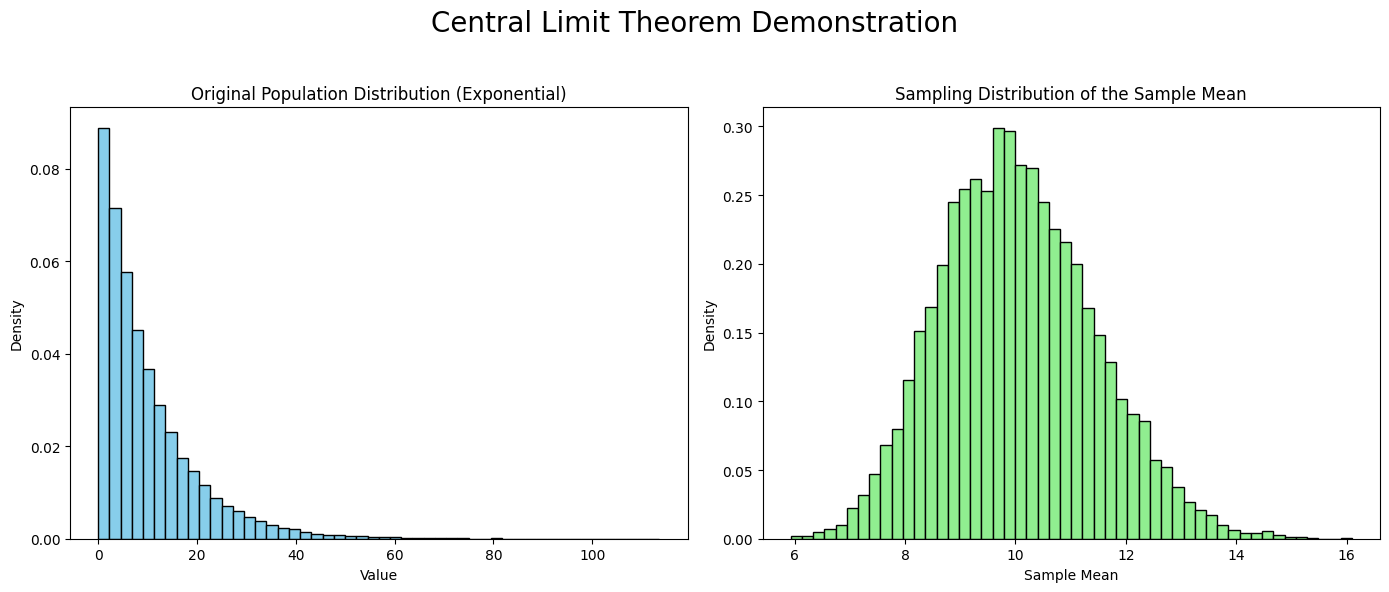

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the original population distribution
ax1.hist(population, bins=50, density=True, color='skyblue', edgecolor='black')
ax1.set_title('Original Population Distribution (Exponential)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Plot the sampling distribution of the sample mean
ax2.hist(sampling_distribution, bins=50, density=True, color='lightgreen', edgecolor='black')
ax2.set_title('Sampling Distribution of the Sample Mean')
ax2.set_xlabel('Sample Mean')
ax2.set_ylabel('Density')

fig.suptitle('Central Limit Theorem Demonstration', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();